In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv('C:/Users/alano/Documents/Master/Graduation Project/implementation/ECU-IoFT_Dataset.csv')
df.head()

NO  ID            Time             Source             Destination Protocol  \
0   1   1  12/9/2021 4:34                NaN  7a:ad:8f:23:25:a7 (RA)   802.11   
1   2   2  12/9/2021 4:34                NaN  34:d2:62:a0:4e:88 (RA)   802.11   
2   3   3  12/9/2021 4:34                NaN  34:d2:62:a0:4e:88 (RA)   802.11   
3   4   4  12/9/2021 4:34                NaN  34:d2:62:a0:4e:88 (RA)   802.11   
4   5   5  12/9/2021 4:34  7a:ad:8f:23:25:a7       34:d2:62:a0:4e:88   802.11   

   Length                                               Info    Type  \
0      28                    Acknowledgement, Flags=........  Normal   
1      28                    Acknowledgement, Flags=........  Normal   
2      28                    Acknowledgement, Flags=........  Normal   
3      28                    Acknowledgement, Flags=........  Normal   
4      44  QoS Null function (No data), SN=549, FN=0, Fla...  Normal   

  Type.of.Attack Attack.Scenario  
0      No Attack      No Attack   
1      No Attack      No Attack   
2      No Attack      No Attack   
3      No Attack      No Attack   
4      No Attack      No Attack

In [6]:
df.drop('ID', axis=1, inplace=True)
df.drop('NO', axis=1, inplace=True)
df.head()

Time             Source             Destination Protocol  Length  \
0  12/9/2021 4:34                NaN  7a:ad:8f:23:25:a7 (RA)   802.11      28   
1  12/9/2021 4:34                NaN  34:d2:62:a0:4e:88 (RA)   802.11      28   
2  12/9/2021 4:34                NaN  34:d2:62:a0:4e:88 (RA)   802.11      28   
3  12/9/2021 4:34                NaN  34:d2:62:a0:4e:88 (RA)   802.11      28   
4  12/9/2021 4:34  7a:ad:8f:23:25:a7       34:d2:62:a0:4e:88   802.11      44   

                                                Info    Type Type.of.Attack  \
0                    Acknowledgement, Flags=........  Normal      No Attack   
1                    Acknowledgement, Flags=........  Normal      No Attack   
2                    Acknowledgement, Flags=........  Normal      No Attack   
3                    Acknowledgement, Flags=........  Normal      No Attack   
4  QoS Null function (No data), SN=549, FN=0, Fla...  Normal      No Attack   

  Attack.Scenario  
0      No Attack   
1      No Attack   
2      No Attack   
3      No Attack   
4      No Attack

In [57]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df['Type'].value_counts()

Type
Normal    33127
Attack    21365
Name: count, dtype: int64

In [4]:
df['Type.of.Attack'].value_counts()

Type.of.Attack
No Attack                        33127
WPA2-PSK WIFI Cracking Attack    17263
Wifi Deauthentication Attack      3893
TELLO API Exploit                  209
Name: count, dtype: int64

In [5]:
df['Attack.Scenario'].value_counts()

Attack.Scenario
WPA2-PSK WIFI Cracking Attack    40526
Wifi Deauthentication Attack     13222
No Attack                          535
TELLO API Exploit                  209
Name: count, dtype: int64

In [7]:
def calculate_missing_values(df):

    unique_count = []
    total_rows = len(df)
    for column in df.columns:
        missing_count = df[column].isnull().sum()
        missing_percentage = (missing_count / total_rows) * 100
        unique_count.append([column, df[column].nunique(), missing_count, missing_percentage])

    return pd.DataFrame(unique_count, columns=['Column', 'Unique', 'Missing', 'Missing %']).set_index('Column')
calculate_missing_values(df)

Unique  Missing  Missing %
Column                                     
Time                  6        0   0.000000
Source               10    18929  34.737209
Destination          20        0   0.000000
Protocol              4        0   0.000000
Length              285        0   0.000000
Info              14113        0   0.000000
Type                  2        0   0.000000
Type.of.Attack        4        0   0.000000
Attack.Scenario       4        0   0.000000

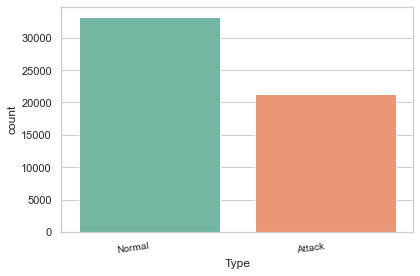

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df.Type, palette='Set2')
plt.xticks(rotation=8, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [16]:
pip install seaborn

     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     ------ ------------------------------ 30.7/165.5 kB 640.0 kB/s eta 0:00:01
     ------------- ----------------------- 61.4/165.5 kB 656.4 kB/s eta 0:00:01
     -------------------------------- ----- 143.4/165.5 kB 1.1 MB/s eta 0:00:01
     ------------------------------------ 165.5/165.5 kB 988.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   -------- ------------------------------- 61.4/294.9 kB 1.1 MB/s eta 0:00:01
   ---------------------- ----------------- 163.8/294.9 kB 2.0 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.9 kB 2.0 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:-


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


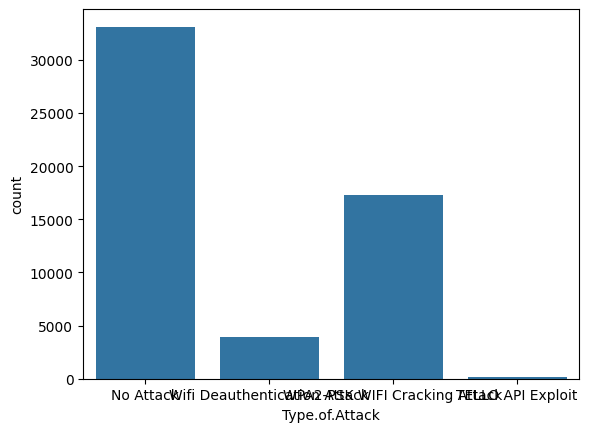

In [9]:
sns.countplot(x=df['Type.of.Attack'])
plt.show()

C:\Users\alano\AppData\Local\Temp\ipykernel_29048\2226483210.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Type.of.Attack'], palette='Set2')


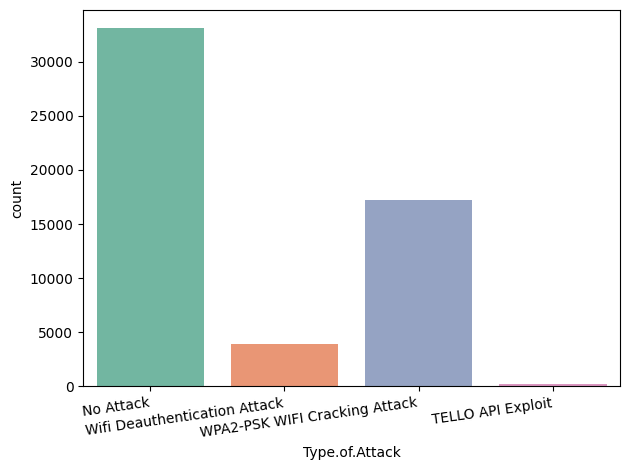

In [23]:
sns.countplot(x=df['Type.of.Attack'], palette='Set2')
plt.xticks(rotation=8, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

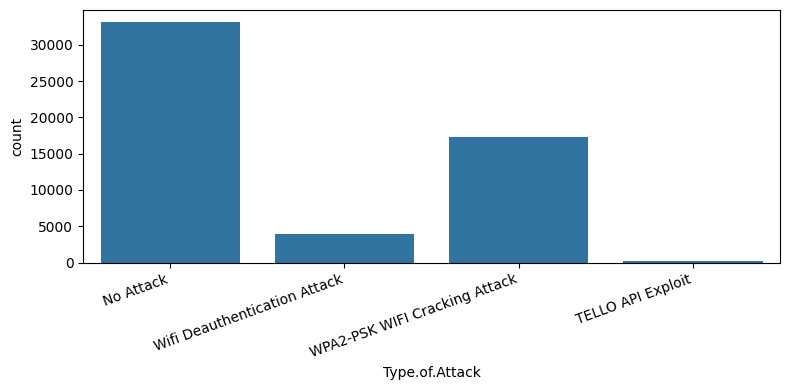

In [12]:
plt.figure(figsize=(8, 4))  # Adjust the figure size
sns.countplot(x=df['Type.of.Attack'])
plt.xticks(rotation=20, ha='right')  # Rotate the x-axis labels and align them to the right
plt.tight_layout()  # Ensure everything fits within the plot area
plt.show()

C:\Users\alano\AppData\Local\Temp\ipykernel_29048\1368752896.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Attack.Scenario'], palette='Set2')


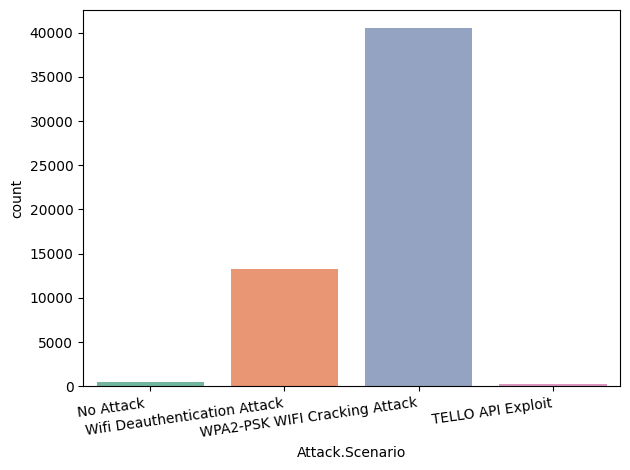

In [27]:
sns.countplot(x=df['Attack.Scenario'], palette='Set2')
plt.xticks(rotation=8, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


In [9]:
# 
# df['Response_Time'] = df['Detection_Time'] + pd.Timedelta(seconds=10)
# 
# df['Latency'] = (df['Response_Time'] - df['Detection_Time']).dt.total_seconds()
# 

# 
# print(df[['Time', 'Detection_Time', 'Response_Time', 'Latency']].head())
# 
# print(df['Latency'].describe())

In [10]:
# import matplotlib.pyplot as plt

# Plotting histogram of latency
# df['Latency'].hist(bins=30)
# plt.title('Latency Distribution')
# plt.xlabel('Latency (seconds)')
# plt.ylabel('Frequency')
# plt.show()
# 
# # Time-series plot of latency
# df.set_index('Detection_Time')['Latency'].plot()
# plt.title('Latency Over Time')
# plt.xlabel('Time')
# plt.ylabel('Latency (seconds)')
# plt.show()


# Feature engineering

In [11]:
# sing zero trust by adding the column "score" by using the risk environment matrix for evaluating the score for each attack in the dataset, 
# based on column "Type, attack scenario, type of attack " to monitor the life cycle during flight

# def calculate_attack_scores(row):
#     if row['Type'] == 'Normal':
#         return 0 
#     attack_scores = {
#         'No Attack': 0,
#         'WPA2-PSK WIFI Cracking Attack': 3.5,
#         'Wifi Deauthentication Attack': 3,
#         'TELLO API Exploit': 4
#     }
#     return attack_scores.get(row['Type.of.Attack'], 0)
# 
# df['Score'] = df.apply(calculate_attack_scores, axis=1)
# print(df[['Score', 'Type', 'Attack.Scenario', 'Type.of.Attack']].value_counts())


In [12]:
# def calculate_score(row):
#     if row['Type'] == 'Normal':
#         if row['Type.of.Attack'] == 'No Attack' and row['Attack.Scenario'] == 'No Attack':
#             return 0
#         else:
#             return 1.5
#     elif row['Type'] == 'Attack':
#         if row['Type.of.Attack'] == 'TELLO API Exploit':
#             return 4
#         elif row['Type.of.Attack'] == 'WPA2-PSK WIFI Cracking Attack':
#             return 3.5

#         elif row['Type.of.Attack'] == 'wifi Deauthentication Attack':
#             return 3
#     return 0
# 
# df['Score'] = df.apply(calculate_score, axis=1)
# print(df[['Score', 'Type', 'Attack.Scenario', 'Type.of.Attack']].value_counts())

In [61]:
df.head()

Time             Source             Destination Protocol  Length  \
0  12/9/2021 4:34                NaN  7a:ad:8f:23:25:a7 (RA)   802.11      28   
1  12/9/2021 4:34                NaN  34:d2:62:a0:4e:88 (RA)   802.11      28   
2  12/9/2021 4:34                NaN  34:d2:62:a0:4e:88 (RA)   802.11      28   
3  12/9/2021 4:34                NaN  34:d2:62:a0:4e:88 (RA)   802.11      28   
4  12/9/2021 4:34  7a:ad:8f:23:25:a7       34:d2:62:a0:4e:88   802.11      44   

                                                Info    Type Type.of.Attack  \
0                    Acknowledgement, Flags=........  Normal      No Attack   
1                    Acknowledgement, Flags=........  Normal      No Attack   
2                    Acknowledgement, Flags=........  Normal      No Attack   
3                    Acknowledgement, Flags=........  Normal      No Attack   
4  QoS Null function (No data), SN=549, FN=0, Fla...  Normal      No Attack   

  Attack.Scenario  
0      No Attack   
1      No Attack   
2      No Attack   
3      No Attack   
4      No Attack

In [9]:

df['Time'] = pd.to_datetime(df['Time'], format='%d/%m/%Y %H:%M')
df['Month'] = df['Time'].dt.month
df['Day'] = df['Time'].dt.day
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute

## Latency

In [10]:
# Simulate a 'Response_Time' by adding a random delay between 5 to 11 seconds to each detection time
# This introduces some variability, reflecting more realistic system performance
df['Time'] = pd.to_datetime(df['Time'], format='%d/%m/%Y %H:%M')
df['Month'] = df['Time'].dt.month
df['Day'] = df['Time'].dt.day
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute

df['Time'] = pd.to_datetime(df['Time'])
df['Detection_Time'] = pd.to_datetime(df['Time'], format='%d/%m/%Y %H:%M')

df['Response_Time'] = df['Detection_Time'] + pd.to_timedelta(np.random.randint(5, 11, size=len(df)), unit='s')
df['Latency'] = (df['Response_Time'] - df['Detection_Time']).dt.total_seconds()

print(df[['Time', 'Detection_Time', 'Response_Time', 'Latency']].head())
print(df['Latency'].describe())

                 Time      Detection_Time       Response_Time  Latency
0 2021-09-12 04:34:00 2021-09-12 04:34:00 2021-09-12 04:34:08      8.0
1 2021-09-12 04:34:00 2021-09-12 04:34:00 2021-09-12 04:34:08      8.0
2 2021-09-12 04:34:00 2021-09-12 04:34:00 2021-09-12 04:34:08      8.0
3 2021-09-12 04:34:00 2021-09-12 04:34:00 2021-09-12 04:34:08      8.0
4 2021-09-12 04:34:00 2021-09-12 04:34:00 2021-09-12 04:34:10     10.0
count    54492.000000
mean         7.504863
std          1.711730
min          5.000000
25%          6.000000
50%          8.000000
75%          9.000000
max         10.000000
Name: Latency, dtype: float64


In [11]:
def extract_oui(mac):
    """ Extracts and returns the OUI from a MAC address. """
    if pd.isna(mac) or ':' not in mac:
        return 'Unknown'
    return mac.upper().replace(':', '')[:6]

def is_mac_address(address):
    """ Checks if the given address is a MAC address. """
    return ':' in address and len(address.split(':')) == 6


#### Explanation
- Function `extract_oui`: Extracts the OUI from a MAC address.
- Function `is_mac_address`: Determines if a string is a MAC address based on the presence of colons and the correct length.
- Processing Logic:

Add columns to identify if "Source" and "Destination" are MAC or IP addresses.

Extract OUIs from MAC addresses.

Identify special cases like BSSID and RA.

In [12]:
df['Source'].fillna('Unknown', inplace=True)

for column in ['Source', 'Destination']:
    df[column + '_Type'] = df[column].apply(lambda x: 'MAC' if is_mac_address(x) else ('IP' if '.' in x else 'Other'))
    df[column + '_OUI'] = df[column].apply(lambda x: extract_oui(x) if is_mac_address(x) else 'Unknown')

df['Is_BSSID'] = df['Source'].apply(lambda x: 'Yes' if 'BSSID' in str(x) else 'No')
df['Is_RA'] = df['Destination'].apply(lambda x: 'Yes' if 'RA' in str(x) else 'No')

print(df[['Destination', 'Destination_OUI', 'Destination_Type', 'Is_RA']].value_counts())


Destination             Destination_OUI  Destination_Type  Is_RA
7a:ad:8f:23:25:a7       7AAD8F           MAC               No       20956
34:d2:62:a0:4e:88 (RA)  34D262           MAC               Yes      17086
ff:ff:ff:ff:ff:ff       FFFFFF           MAC               No       12003
34:d2:62:a0:4e:88       34D262           MAC               No        2376
7a:ad:8f:23:25:a7 (RA)  7AAD8F           MAC               Yes       1836
192.168.10.2            Unknown          IP                No         207
33:33:00:00:00:16       333300           MAC               No           4
f4:cf:a2:69:92:f8 (RA)  F4CFA2           MAC               Yes          3
33:33:00:00:00:fb       333300           MAC               No           3
da:be:68:d1:8c:47       DABE68           MAC               No           3
ca:ae:63:1d:ab:a6       CAAE63           MAC               No           2
94:08:53:73:15:ad (RA)  940853           MAC               Yes          2
01:00:5e:00:00:16       01005E           MAC   

In [13]:
print(df[['Source', 'Source_OUI', 'Source_Type', 'Is_BSSID']].value_counts())


Source                     Source_OUI  Source_Type  Is_BSSID
34:d2:62:a0:4e:88          34D262      MAC          No          32959
Unknown                    Unknown     Other        No          18929
7a:ad:8f:23:25:a7          7AAD8F      MAC          No           2386
192.168.10.1               Unknown     IP           No            207
7c:8b:ca:df:5f:74          7C8BCA      MAC          No              3
192.168.10.2               Unknown     IP           No              2
a4:91:b1:83:57:9d          A491B1      MAC          No              2
32:91:de:1c:12:97          3291DE      MAC          No              1
3c:22:fb:28:3b:6c          3C22FB      MAC          No              1
7a:ad:8f:23:25:a7 (BSSID)  7AAD8F      MAC          Yes             1
f4:cf:a2:69:92:f8          F4CFA2      MAC          No              1
dtype: int64


In [14]:
def extract_flags(info):
    flag_index = info.find('Flags=')
    if flag_index != -1:
        return info[flag_index + 6:].split(',')[0]
    return 'Unknown'

def extract_sn_fn(info, type):
    if type == 'SN':
        key = 'SN='
    elif type == 'FN':
        key = 'FN='
    else:
        return None
    
    start_index = info.find(key)
    if start_index != -1:
        end_index = info.find(',', start_index)
        if end_index != -1:
            return info[start_index + len(key):end_index]
        return info[start_index + len(key):]
    return 'Unknown'

#### Explanation:
- Functions `extract_flags`, `extract_sn_fn`: These are defined to parse and extract parts of the Info string related to flags and sequence/fragment numbers.
- Usage of astype(str): Converts Info to string type to handle potential non-string types.
- Lambda Functions: Used to apply the `extract_sn_fn` function with parameters for extracting sequence and fragment numbers.

In [15]:
df['Flags'] = df['Info'].astype(str).apply(extract_flags)
df['Sequence_Number'] = df['Info'].apply(lambda x: extract_sn_fn(x, 'SN'))
df['Fragment_Number'] = df['Info'].apply(lambda x: extract_sn_fn(x, 'FN'))
df['Sequence_Number'] = pd.to_numeric(df['Sequence_Number'], errors='coerce')
df['Fragment_Number'] = pd.to_numeric(df['Fragment_Number'], errors='coerce')

df['Sequence_Number'] = df['Sequence_Number'].astype('Int64') 
df['Fragment_Number'] = df['Fragment_Number'].astype('Int64')
print(df[['Info', 'Flags', 'Sequence_Number', 'Fragment_Number']].value_counts())


Info                                     Flags     Sequence_Number  Fragment_Number
QoS Data, SN=3998, FN=0, Flags=.pm.RMF.  .pm.RMF.  3998             0                  27
QoS Data, SN=3884, FN=0, Flags=.pm.RMF.  .pm.RMF.  3884             0                  27
QoS Data, SN=4034, FN=0, Flags=.pm.R.F.  .pm.R.F.  4034             0                  26
QoS Data, SN=4078, FN=0, Flags=.pm.RMF.  .pm.RMF.  4078             0                  26
QoS Data, SN=55, FN=0, Flags=.pm.RMF.    .pm.RMF.  55               0                  26
                                                                                       ..
QoS Data, SN=224, FN=1, Flags=.pm..MF.   .pm..MF.  224              1                   1
QoS Data, SN=2239, FN=2, Flags=.pm...F.  .pm...F.  2239             2                   1
QoS Data, SN=2239, FN=1, Flags=.pm..MF.  .pm..MF.  2239             1                   1
QoS Data, SN=2239, FN=0, Flags=.pm..MF.  .pm..MF.  2239             0                   1
QoS Data, SN=173

In [16]:
from sklearn.preprocessing import LabelEncoder
import pickle

encoder_Type = LabelEncoder()
encoder_Type_of_Attack = LabelEncoder()
encoder_Attack_Scenario = LabelEncoder()

encoder_Type.fit(df['Type'])
encoder_Type_of_Attack.fit(df['Type.of.Attack'])
encoder_Attack_Scenario.fit(df['Attack.Scenario'])

# Save these encoders to disk using pickle to avoid re-encoding issues 
with open('encoder_Type.pkl', 'wb') as file:
    pickle.dump(encoder_Type, file)
with open('encoder_Type_of_Attack.pkl', 'wb') as file:
    pickle.dump(encoder_Type_of_Attack, file)
with open('encoder_Attack_Scenario.pkl', 'wb') as file:
    pickle.dump(encoder_Attack_Scenario, file)

In [25]:
pip install -U scikit-learn scipy matplotlib


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 814.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB 1.3 MB/s eta 0:00:09
    --------------------------------------- 0.1/10.9 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.2/10.9 MB 1.5 MB/s eta 0:00:08
    --------------------------------------- 0.3/10.9 MB 1.5 MB/s eta 0:00:08
   - -------------------------------------- 0.3/10.9 MB 1.5 MB/s eta 0:00:08
   - -------------------------------------- 0.5/10.9 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.5/10.9 MB 1.6 MB/s eta 0:00:07
   -- ------------------------------------- 0.7/10.9 MB 1.8 MB/s eta 0:00:06
   -- ---


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\alano\appdata\local\programs\python\python312\lib\site-packages (1.5.1)




[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
encoder = LabelEncoder()

categorical_columns = ['Protocol', 'Type.of.Attack', 'Attack.Scenario',
                       'Destination', 'Destination_OUI', 'Destination_Type', 'Source', 
                       'Source_OUI', 'Source_Type', 'Is_BSSID', 'Is_RA', 'Info', 'Flags']

for column in categorical_columns:
   
    df[column] = encoder.fit_transform(df[column])

df['Type'] = encoder.fit_transform(df['Type'])
df['Sequence_Number'].fillna(df['Sequence_Number'].median(), inplace=True)
df['Fragment_Number'].fillna(df['Fragment_Number'].median(), inplace=True)
df.head()

Time  Source  Destination  Protocol  Length   Info  Type  \
0 2021-09-12 04:34:00       8           13         0      28     11     1   
1 2021-09-12 04:34:00       8           10         0      28     11     1   
2 2021-09-12 04:34:00       8           10         0      28     11     1   
3 2021-09-12 04:34:00       8           10         0      28     11     1   
4 2021-09-12 04:34:00       5            9         0      44  14062     1   

   Type.of.Attack  Attack.Scenario  Month  ...  Latency  Source_Type  \
0               0                0      9  ...      8.0            2   
1               0                0      9  ...      8.0            2   
2               0                0      9  ...      8.0            2   
3               0                0      9  ...      8.0            2   
4               0                0      9  ...     10.0            1   

   Source_OUI Destination_Type Destination_OUI  Is_BSSID  Is_RA  Flags  \
0           7                1               6         0      1      0   
1           7                1               4         0      1      0   
2           7                1               4         0      1      0   
3           7                1               4         0      1      0   
4           3                1               4         0      0      1   

   Sequence_Number  Fragment_Number  
0             1423                0  
1             1423                0  
2             1423                0  
3             1423                0  
4              549                0  

[5 rows x 25 columns]

# Balanced Dataset


In [18]:
df_class_0 = df[df['Type'] == 0]
df_class_1 = df[df['Type'] == 1]

df_class_1_under = df_class_1.sample(len(df_class_0), random_state=42)
df_train_balanced = pd.concat([df_class_0, df_class_1_under], axis=0)
df_train_balanced = df_train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
df_train_balanced.head()

Time  Source  Destination  Protocol  Length   Info  Type  \
0 2021-09-12 22:28:00       3           12         0     564  12537     1   
1 2021-09-13 03:04:00       8           10         0      28     11     1   
2 2021-09-13 03:04:00       3           18         0      38   4337     0   
3 2021-09-13 03:04:00       3           12         0     131  11802     0   
4 2021-09-12 22:28:00       3           12         0     564   7200     1   

   Type.of.Attack  Attack.Scenario  Month  ...  Latency  Source_Type  \
0               0                3      9  ...     10.0            1   
1               0                2      9  ...      8.0            2   
2               2                2      9  ...      8.0            1   
3               2                2      9  ...      6.0            1   
4               0                3      9  ...      5.0            1   

   Source_OUI Destination_Type Destination_OUI  Is_BSSID  Is_RA  Flags  \
0           1                1               6         0      0     12   
1           7                1               4         0      1      0   
2           1                1              11         0      0      0   
3           1                1               6         0      0     13   
4           1                1               6         0      0     12   

   Sequence_Number  Fragment_Number  
0              588                0  
1             1423                0  
2              762                0  
3             4042                0  
4             1786                1  

[5 rows x 25 columns]

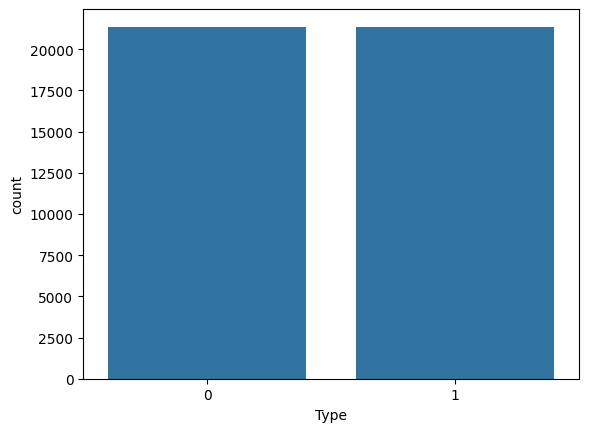

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df_train_balanced.Type)
plt.show()

0    21365
2    17263
3     3893
1      209
Name: Type.of.Attack, dtype: int64


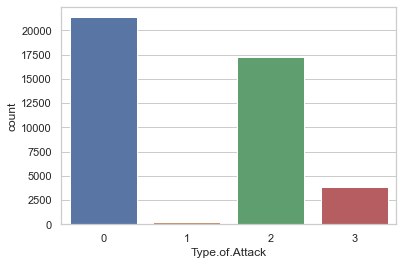

In [19]:
sns.countplot(x=df_train_balanced['Type.of.Attack'])
print(df_train_balanced['Type.of.Attack'].value_counts())
plt.show()

Attack.Scenario
2    32244
3     9931
0      346
1      209
Name: count, dtype: int64


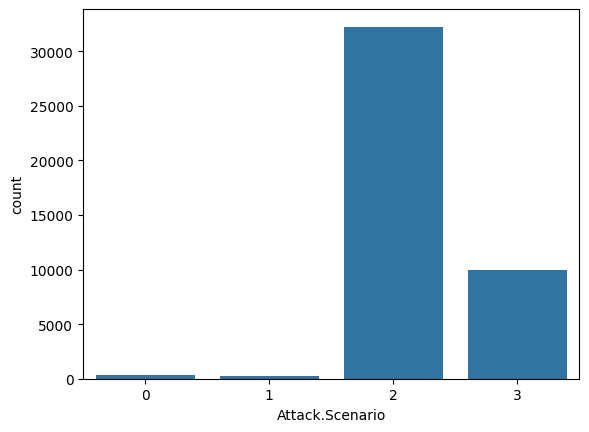

In [25]:
sns.countplot(x=df_train_balanced['Attack.Scenario'])
print(df_train_balanced['Attack.Scenario'].value_counts())

plt.show()

In [20]:
df_train_balanced.columns

Index(['Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info', 'Type',
       'Type.of.Attack', 'Attack.Scenario', 'Month', 'Day', 'Hour', 'Minute',
       'Detection_Time', 'Response_Time', 'Latency', 'Source_Type',
       'Source_OUI', 'Destination_Type', 'Destination_OUI', 'Is_BSSID',
       'Is_RA', 'Flags', 'Sequence_Number', 'Fragment_Number'],
      dtype='object')

In [28]:
# df_train_balanced['Year'] = df_train_balanced['Time'].dt.year
# df_train_balanced['Month'] = df_train_balanced['Time'].dt.month
# df_train_balanced['Day'] = df_train_balanced['Time'].dt.day
# df_train_balanced['Hour'] = df_train_balanced['Time'].dt.hour
# df_train_balanced['Minute'] = df_train_balanced['Time'].dt.minute
# df_train_balanced['Day_of_Week'] = df_train_balanced['Time'].dt.dayofweek 
# 
# df_train_balanced['Hour_sin'] = np.sin(2 * np.pi * df_train_balanced['Hour']/24)
# df_train_balanced['Hour_cos'] = np.cos(2 * np.pi * df_train_balanced['Hour']/24)
# df_train_balanced['Month_sin'] = np.sin(2 * np.pi * df_train_balanced['Month']/12)
# df_train_balanced['Month_cos'] = np.cos(2 * np.pi * df_train_balanced['Month']/12)
# df_train_balanced['Day_of_Week_sin'] = np.sin(2 * np.pi * df_train_balanced['Day_of_Week']/7)
# df_train_balanced['Day_of_Week_cos'] = np.cos(2 * np.pi * df_train_balanced['Day_of_Week']/7)


In [21]:
correlations = df_train_balanced.corr()
print(correlations['Type'].sort_values(ascending=False))


Type                1.000000
Is_RA               0.629835
Source_Type         0.628930
Source              0.602236
Source_OUI          0.593673
Fragment_Number     0.377846
Length              0.264038
Hour                0.119918
Minute              0.112992
Attack.Scenario     0.081992
Destination_Type    0.070109
Flags               0.069235
Is_BSSID            0.004838
Latency             0.001176
Protocol           -0.069811
Info               -0.108751
Day                -0.136400
Sequence_Number    -0.233623
Destination        -0.558473
Destination_OUI    -0.624992
Type.of.Attack     -0.967295
Month                    NaN
Name: Type, dtype: float64


# Multi Classifier Models with `Type`, `Type.of.Attack`, `Attack.Scenario` Targets Features

In [22]:
# df_train_balanced.to_csv('TrainingDataset2.csv', index=False)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.multioutput import MultiOutputClassifier
import psutil
import time


In [23]:
def simulate_network_latency():
    # network delay of between 100ms and 300ms
    time.sleep(np.random.uniform(0.1, 0.3))

def total_system_with_network_latency(model, data):

    cpu_start = psutil.cpu_percent(interval=None)
    memory_start = psutil.virtual_memory().used

    system_start_time = time.time()  
    
    # Simulate the start of network latency (without actual delay)
    fixed_delay = 10  

    start_time = time.time()
    predictions = model.predict(data)
    end_time = time.time()

    prediction_latency = end_time - start_time

    system_end_time = time.time()
    total_system_latency = (system_end_time - system_start_time) + fixed_delay
    
    cpu_end = psutil.cpu_percent(interval=None)
    memory_end = psutil.virtual_memory().used

    cpu_usage = cpu_end - cpu_start
    memory_usage = memory_end - memory_start 

    return predictions, prediction_latency, total_system_latency, cpu_usage, memory_usage

def false_alarm_rate(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    FPR = fp / (fp + tn) 
    FNR = fn / (fn + tp) 
    FAR = (FPR + FNR) / 2

    sensitivity = tp / (tp + fn) 
    specificity = tn / (tn + fp) 
    mcc = matthews_corrcoef(y_true, y_pred)
    
    return FPR, FNR, FAR, sensitivity, specificity, mcc

def multiclass_false_alarm_rate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0][0]
    fp = cm[0][1:].sum()
    fn = cm[1:, 0].sum()
    tp = cm[1:, 1:].sum()

    FPR = fp / (fp + tn) if fp + tn != 0 else 0  
    FNR = fn / (fn + tp) if fn + tp != 0 else 0
    FAR = (FPR + FNR) / 2
    sensitivity = tp / (tp + fn) if tp + fn != 0 else 0
    specificity = tn / (tn + fp) if tn + fp != 0 else 0
    mcc = matthews_corrcoef(y_true, y_pred)  

    return FPR, FNR, FAR, sensitivity, specificity, mcc

In [26]:
X = df_train_balanced.drop(['Time', 'Detection_Time', 'Response_Time', 'Type.of.Attack', 'Attack.Scenario', 'Type'], axis=1)
y = df_train_balanced[['Type']] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_model.fit(X_train, y_train)
print("Trained K-Nearest Neighbors with MultiOutputClassifier")

dt_model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=4, min_samples_leaf=2)
dt_model.fit(X_train, y_train)
print("Trained Decision Tree with MultiOutputClassifier")

nb_model =GaussianNB(var_smoothing=1e-9)
nb_model.fit(X_train, y_train)
print("Trained Gaussian Naive Bayes with MultiOutputClassifier")

svm_model = SVC(C=1.0, kernel='rbf', gamma='scale', probability=True)
svm_model.fit(X_train, y_train)
print("Trained Support Vector Machine with MultiOutputClassifier")

lr_model = LogisticRegression(C=0.1, max_iter=1000, solver='liblinear')
lr_model.fit(X_train, y_train)
print("Trained Logistic Regression with MultiOutputClassifier")

rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5, min_samples_leaf=4)
rf_model.fit(X_train, y_train)
print("Trained Random Forest with MultiOutputClassifier")

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Trained K-Nearest Neighbors with MultiOutputClassifier
Trained Decision Tree with MultiOutputClassifier


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Trained Gaussian Naive Bayes with MultiOutputClassifier
Trained Support Vector Machine with MultiOutputClassifier


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Trained Logistic Regression with MultiOutputClassifier


C:\Users\alano\AppData\Local\Temp/ipykernel_34428/3279582965.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Trained Random Forest with MultiOutputClassifier


#### Overview
In this project, we aim to classify network events into three target variables: Type, Type.of.Attack, and Attack.Scenario. To achieve this, we employed a range of machine learning models wrapped in MultiOutputClassifier to handle the multi-output nature of the problem.

The dataset was split into features (X) and targets (y). The targets include three labels:

- Type: General classification into 'Normal' and 'Attack'.
- Type.of.Attack: Specifies the type of attack.
- Attack.Scenario: Describes the attack scenario in detail.
Features were selected excluding irrelevant columns such as Time, Detection_Time, Response_Time, Type.of.Attack, Attack.Scenario, Type, and Score.

Models and Training
We used the MultiOutputClassifier to handle multiple target variables. Here are the models trained:

1 - K-Nearest Neighbors (KNN)

- Classifier: KNeighborsClassifier
- Parameters: n_neighbors=5, weights='distance'
- Description: KNN works by finding the most similar data points (neighbors) and assigning the majority label to the prediction.

2 - Decision Tree (DT)

- Classifier: DecisionTreeClassifier
- Parameters: random_state=42, max_depth=5, min_samples_split=4, min_samples_leaf=2
- Description: Decision trees split the data into branches to make predictions based on feature values.

3 - Gaussian Naive Bayes (GNB)

- Classifier: GaussianNB
- Parameters: var_smoothing=1e-9
- Description: Naive Bayes classifiers are probabilistic models based on Bayes' theorem, assuming independence between features.

4 - Support Vector Machine (SVM)

- Classifier: SVC
- Parameters: C=1.0, kernel='rbf', gamma='scale', probability=True
- Description: SVMs find the hyperplane that best separates different classes in the feature space.

5 - Logistic Regression (LR)

- Classifier: LogisticRegression
- Parameters: C=0.1, max_iter=1000, solver='liblinear'
- Description: Logistic regression models the probability of the default class (attack or no attack) using a logistic function.

6 - Random Forest (RF)

- Classifier: RandomForestClassifier
- Parameters: random_state=42, n_estimators=100, max_depth=5, min_samples_leaf=4
- Description: Random forests build multiple decision trees and combine their outputs to improve accuracy and control over-fitting.

In [27]:
import joblib
from joblib import dump

# save models
joblib.dump(knn_model, 'knn_model.pkl')
joblib.dump(dt_model, 'dt_model.pkl')
joblib.dump(nb_model, 'nb_model.pkl')
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(lr_model, 'lr_model.pkl')
joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']

In [47]:
import time
from sklearn.tree import DecisionTreeClassifier

# Start time
start_time = time.time()

# Model training
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# End time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")
predictions = model.predict(X_test)

acc = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions, digits=5)
conf_matrix = confusion_matrix(y_test, predictions)
f1 = f1_score(y_test,  predictions, average='weighted')
precision = precision_score(y_test,  predictions, average='weighted')
recall = recall_score(y_test,  predictions, average='weighted')
print("Accuracy on test set:", acc)


Training Time: 0.15890049934387207 seconds
Accuracy on test set: 0.9997659723847414


# Model evaluation

c:\Users\alano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\alano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\alano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\alano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: 


Confusion Matrix:
 [[4395    1]
 [  35 4115]]

Model: Random Forest
Cross-validation accuracy scores: [0.99634343 0.99575837 0.99663595 0.99414948 0.99488005]
Mean cross-validation accuracy: 0.9955534556105547
Accuracy on test set: 0.9957875029253452
Classification Report:
              precision    recall  f1-score   support

           0    0.99210   0.99977   0.99592      4396
           1    0.99976   0.99157   0.99564      4150

    accuracy                        0.99579      8546
   macro avg    0.99593   0.99567   0.99578      8546
weighted avg    0.99582   0.99579   0.99579      8546

K-Nearest Neighbors (KNN) Model Evaluation:
Accuracy on test set: 0.9957875029253452
F1 Score: 0.9957869532361042
Precision: 0.9958179689419372
Recall: 0.9957875029253452

False Positive Rate: 0.00022747952684258417, 
False Negative Rate: 0.008433734939759036, 
False Alarm Rate: 0.00433060723330081, 
Sensitivity: 0.9915662650602409, 
Specificity: 0.9997725204731575, 
Matthews Correlation Coeffic

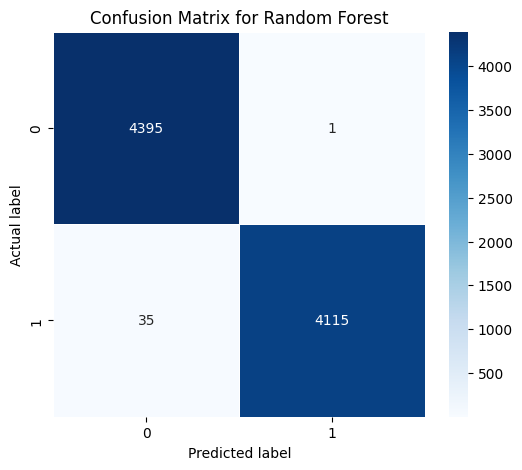

In [80]:
models = [knn_model, dt_model, nb_model, svm_model, lr_model, rf_model]
model_names = ['KNN', 'Decision Tree', 'Naïve Bayes', 'SVM', 'Logistic Regression', 'Random Forest']

for model, name in zip(models, model_names):
       
    predictions, prediction_latency, total_system_latency, cpu_usage, memory_usage = total_system_with_network_latency(model, X_test)

    # Perform cross-validation

    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Evaluate the model
acc = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions, digits=5)
conf_matrix = confusion_matrix(y_test, predictions)
f1 = f1_score(y_test,  predictions, average='weighted')
precision = precision_score(y_test,  predictions, average='weighted')
recall = recall_score(y_test,  predictions, average='weighted')

# Printing the evaluation metrics

print("\nConfusion Matrix:\n", conf_matrix)
    
FPR, FNR, FAR, sensitivity, specificity, mcc = false_alarm_rate(y_test, predictions)
    
print(f"\nModel: {name}")
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean()}")
print("Accuracy on test set:", acc)
print("Classification Report:")
print(report)
print("K-Nearest Neighbors (KNN) Model Evaluation:")
print("Accuracy on test set:", acc)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print(f"\nFalse Positive Rate: {FPR}, \nFalse Negative Rate: {FNR}, \nFalse Alarm Rate: {FAR}, \nSensitivity: {sensitivity}, \nSpecificity: {specificity}, \nMatthews Correlation Coefficient: {mcc}")
print("\nSystem Performance Metrics:")
print(f"Prediction Latency (seconds): {prediction_latency}")
print(f"Total System Latency (seconds, including 10 seconds): {total_system_latency}")
print(f"CPU Usage (% change): {cpu_usage}")
print(f"Memory Usage (bytes change): {memory_usage}")
print("=====================================================")
    
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', linewidths=.5)
plt.title(f'Confusion Matrix for {name}')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#### Evaluation
For each model, we evaluated performance using accuracy, classification reports, confusion matrices, and several other metrics.

- Accuracy: Measures the proportion of correct predictions.
- Classification Report: Includes precision, recall, and F1-score for each class.
- Confusion Matrix: Shows the counts of true positives, true negatives, false positives, and false negatives.
- False Positive Rate (FPR), False Negative Rate (FNR), False Alarm Rate (FAR), Sensitivity, Specificity, and Matthews Correlation Coefficient (MCC): Additional metrics to understand the model performance.
- System Performance Metrics: Includes prediction latency, total system latency, CPU usage, and memory usage.

# Round Trip

c:\Users\alano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\alano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\alano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\alano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: 


Model: KNN
Cross-validation accuracy scores: [0.99268685 0.99195554 0.99400322 0.99005412 0.99136922]
Mean cross-validation accuracy: 0.9920137887734903
Accuracy on test set: 0.9919260472735782
Classification Report:
              precision    recall  f1-score   support

           0    0.98937   0.99500   0.99217      4396
           1    0.99467   0.98867   0.99166      4150

    accuracy                        0.99193      8546
   macro avg    0.99202   0.99184   0.99192      8546
weighted avg    0.99194   0.99193   0.99193      8546


False Positive Rate: 0.005004549590536852, 
False Negative Rate: 0.011325301204819277, 
False Alarm Rate: 0.008164925397678064, 
Sensitivity: 0.9886746987951808, 
Specificity: 0.9949954504094631, 
Matthews Correlation Coefficient: 0.9838528514978125

System Performance Metrics:
Prediction Latency (seconds): 0.018878936767578125
Total System Latency (seconds, including 10 seconds): 10.018878936767578
CPU Usage (% change): -2.799999999999999
Memory Usa

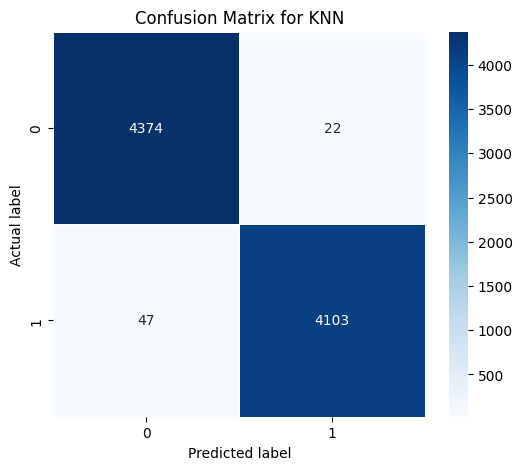


Model: Decision Tree
Cross-validation accuracy scores: [0.98888401 0.99020038 0.98961533 0.98771391 0.99019895]
Mean cross-validation accuracy: 0.9893225156924602
Accuracy on test set: 0.9888836882752164
Classification Report:
              precision    recall  f1-score   support

           0    0.98056   0.99818   0.98929      4396
           1    0.99803   0.97904   0.98844      4150

    accuracy                        0.98888      8546
   macro avg    0.98930   0.98861   0.98887      8546
weighted avg    0.98905   0.98888   0.98888      8546


False Positive Rate: 0.0018198362147406734, 
False Negative Rate: 0.020963855421686748, 
False Alarm Rate: 0.011391845818213711, 
Sensitivity: 0.9790361445783132, 
Specificity: 0.9981801637852593, 
Matthews Correlation Coefficient: 0.9779046817701044

System Performance Metrics:
Prediction Latency (seconds): 0.018878936767578125
Total System Latency (seconds, including 10 seconds): 10.018878936767578
CPU Usage (% change): -2.799999999999999

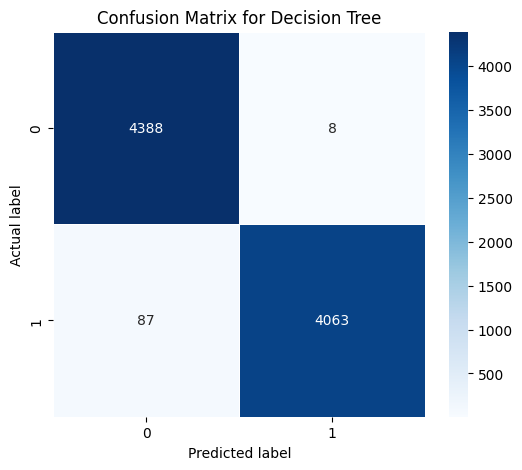

c:\Users\alano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\alano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\alano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\alano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataC


Model: Naïve Bayes
Cross-validation accuracy scores: [0.88079567 0.8810882  0.88547609 0.88796256 0.8857519 ]
Mean cross-validation accuracy: 0.8842148823139299
Accuracy on test set: 0.8828691785630705
Classification Report:
              precision    recall  f1-score   support

           0    0.86814   0.91060   0.88886      4396
           1    0.90013   0.85349   0.87619      4150

    accuracy                        0.88287      8546
   macro avg    0.88413   0.88205   0.88253      8546
weighted avg    0.88367   0.88287   0.88271      8546


False Positive Rate: 0.08939945404913557, 
False Negative Rate: 0.14650602409638555, 
False Alarm Rate: 0.11795273907276056, 
Sensitivity: 0.8534939759036144, 
Specificity: 0.9106005459508644, 
Matthews Correlation Coefficient: 0.7661786515114034

System Performance Metrics:
Prediction Latency (seconds): 0.018878936767578125
Total System Latency (seconds, including 10 seconds): 10.018878936767578
CPU Usage (% change): -2.799999999999999
Memor

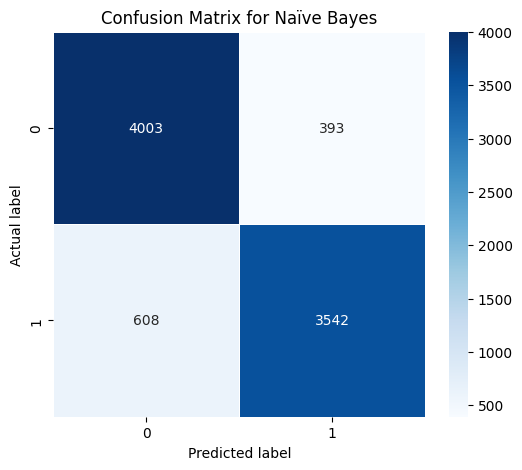

c:\Users\alano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\alano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\alano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\alano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataC


Model: SVM
Cross-validation accuracy scores: [0.9774755  0.97703671 0.97411145 0.97133246 0.97834991]
Mean cross-validation accuracy: 0.9756612066670243
Accuracy on test set: 0.9775333489351743
Classification Report:
              precision    recall  f1-score   support

           0    0.97385   0.98271   0.97826      4396
           1    0.98151   0.97205   0.97676      4150

    accuracy                        0.97753      8546
   macro avg    0.97768   0.97738   0.97751      8546
weighted avg    0.97757   0.97753   0.97753      8546


False Positive Rate: 0.017288444040036398, 
False Negative Rate: 0.027951807228915663, 
False Alarm Rate: 0.022620125634476032, 
Sensitivity: 0.9720481927710843, 
Specificity: 0.9827115559599636, 
Matthews Correlation Coefficient: 0.9550592430993534

System Performance Metrics:
Prediction Latency (seconds): 0.018878936767578125
Total System Latency (seconds, including 10 seconds): 10.018878936767578
CPU Usage (% change): -2.799999999999999
Memory Usa

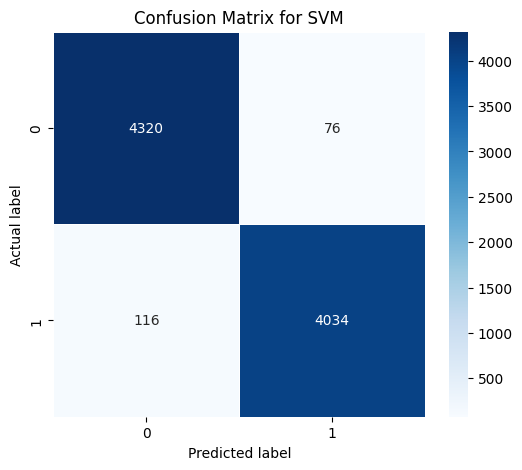

c:\Users\alano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\alano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\alano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\alano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataC


Model: Logistic Regression
Cross-validation accuracy scores: [0.95187948 0.95246453 0.94924675 0.94968553 0.95669982]
Mean cross-validation accuracy: 0.9519952230459108
Accuracy on test set: 0.9548326702550901
Classification Report:
              precision    recall  f1-score   support

           0    0.94398   0.96975   0.95669      4396
           1    0.96700   0.93904   0.95281      4150

    accuracy                        0.95483      8546
   macro avg    0.95549   0.95439   0.95475      8546
weighted avg    0.95516   0.95483   0.95481      8546


False Positive Rate: 0.030254777070063694, 
False Negative Rate: 0.060963855421686745, 
False Alarm Rate: 0.04560931624587522, 
Sensitivity: 0.9390361445783133, 
Specificity: 0.9697452229299363, 
Matthews Correlation Coefficient: 0.9098772676711999

System Performance Metrics:
Prediction Latency (seconds): 0.018878936767578125
Total System Latency (seconds, including 10 seconds): 10.018878936767578
CPU Usage (% change): -2.79999999999

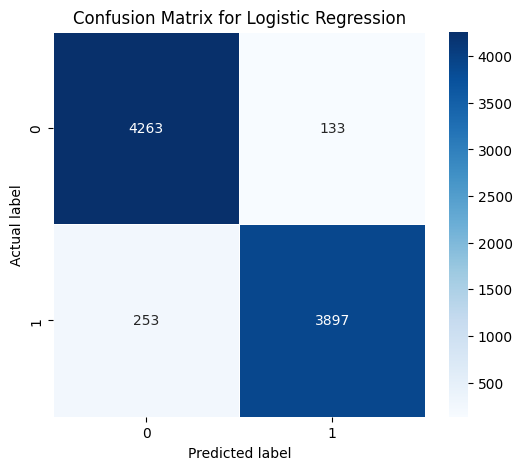

c:\Users\alano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\alano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\alano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\alano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConvers


Model: Random Forest
Cross-validation accuracy scores: [0.99634343 0.99575837 0.99663595 0.99414948 0.99488005]
Mean cross-validation accuracy: 0.9955534556105547
Accuracy on test set: 0.9957875029253452
Classification Report:
              precision    recall  f1-score   support

           0    0.99210   0.99977   0.99592      4396
           1    0.99976   0.99157   0.99564      4150

    accuracy                        0.99579      8546
   macro avg    0.99593   0.99567   0.99578      8546
weighted avg    0.99582   0.99579   0.99579      8546


False Positive Rate: 0.00022747952684258417, 
False Negative Rate: 0.008433734939759036, 
False Alarm Rate: 0.00433060723330081, 
Sensitivity: 0.9915662650602409, 
Specificity: 0.9997725204731575, 
Matthews Correlation Coefficient: 0.991597543233689

System Performance Metrics:
Prediction Latency (seconds): 0.018878936767578125
Total System Latency (seconds, including 10 seconds): 10.018878936767578
CPU Usage (% change): -2.799999999999999


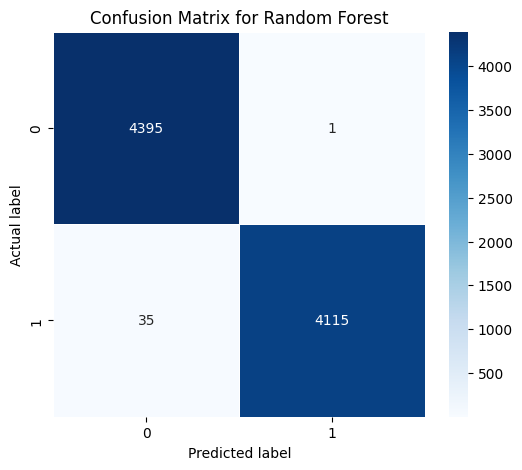

In [81]:
# Load the models
knn_model = joblib.load('knn_model.pkl')
dt_model = joblib.load('dt_model.pkl')
nb_model = joblib.load('nb_model.pkl')
svm_model = joblib.load('svm_model.pkl')
lr_model = joblib.load('lr_model.pkl')
rf_model = joblib.load('rf_model.pkl')


models = [knn_model, dt_model, nb_model, svm_model, lr_model, rf_model]
model_names = ['KNN', 'Decision Tree', 'Naïve Bayes', 'SVM', 'Logistic Regression', 'Random Forest']

for model, name in zip(models, model_names):
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Evaluate the model
    acc = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions, digits=5)
    conf_matrix = confusion_matrix(y_test, predictions)
    
    FPR, FNR, FAR, sensitivity, specificity, mcc = false_alarm_rate(y_test, predictions)
    
    print(f"\nModel: {name}")
    print(f"Cross-validation accuracy scores: {cv_scores}")
    print(f"Mean cross-validation accuracy: {cv_scores.mean()}")
    print("Accuracy on test set:", acc)
    print("Classification Report:")
    print(report)
    print(f"\nFalse Positive Rate: {FPR}, \nFalse Negative Rate: {FNR}, \nFalse Alarm Rate: {FAR}, \nSensitivity: {sensitivity}, \nSpecificity: {specificity}, \nMatthews Correlation Coefficient: {mcc}")
    print("\nSystem Performance Metrics:")
    print(f"Prediction Latency (seconds): {prediction_latency}")
    print(f"Total System Latency (seconds, including 10 seconds): {total_system_latency}")
    print(f"CPU Usage (% change): {cpu_usage}")
    print(f"Memory Usage (bytes change): {memory_usage}")
    print("=====================================================")
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', linewidths=.5)
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

                 Model  Accuracy  Precision    Recall  F1-Score
0                  KNN  0.991926   0.991942  0.991926  0.991925
1        Decision Tree  0.988884   0.989045  0.988884  0.988880
2          Naïve Bayes  0.882869   0.883674  0.882869  0.882710
3                  SVM  0.977533   0.977569  0.977533  0.977530
4  Logistic Regression  0.954833   0.955156  0.954833  0.954805
5        Random Forest  0.995788   0.995818  0.995788  0.995787


C:\Users\alano\AppData\Local\Temp\ipykernel_26704\204922027.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=df_results, palette='coolwarm', ax=axes[0, 0])
C:\Users\alano\AppData\Local\Temp\ipykernel_26704\204922027.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Precision', y='Model', data=df_results, palette='coolwarm', ax=axes[0, 1])
C:\Users\alano\AppData\Local\Temp\ipykernel_26704\204922027.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recall', y='Model', data=df_results, palette='cool

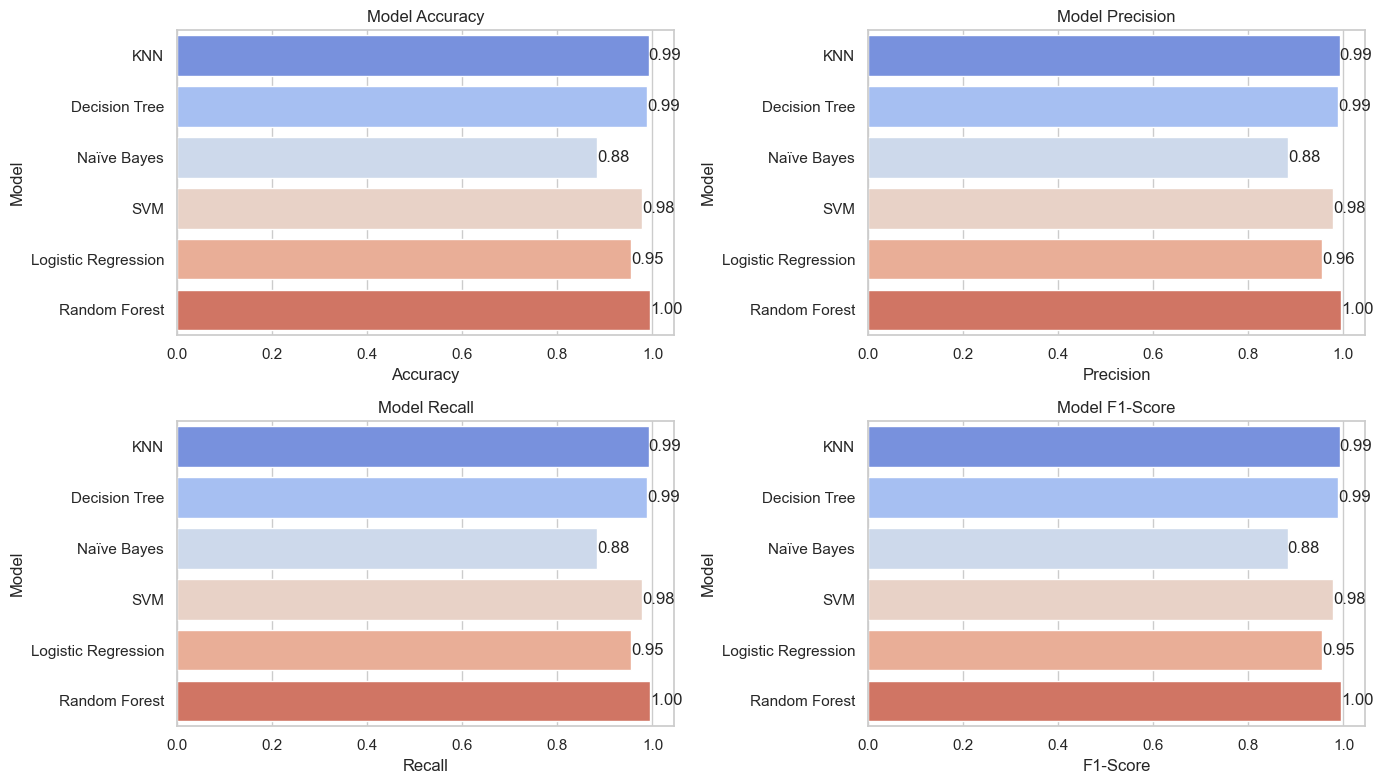

In [82]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

models = [knn_model, dt_model, nb_model, svm_model, lr_model, rf_model]
model_names = ['KNN', 'Decision Tree', 'Naïve Bayes', 'SVM', 'Logistic Regression', 'Random Forest']

results = []
column_of_interest = 'Type'

for model, name in zip(models, model_names):
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test[column_of_interest], predictions)
    precision = precision_score(y_test[column_of_interest], predictions, average='weighted')
    recall = recall_score(y_test[column_of_interest], predictions, average='weighted')
    f1 = f1_score(y_test[column_of_interest], predictions, average='weighted')

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

df_results = pd.DataFrame(results)

print(df_results)

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Accuracy
sns.barplot(x='Accuracy', y='Model', data=df_results, palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Model Accuracy')
for i in axes[0, 0].containers:
    axes[0, 0].bar_label(i, fmt='%.2f')

# Precision
sns.barplot(x='Precision', y='Model', data=df_results, palette='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title('Model Precision')
for i in axes[0, 1].containers:
    axes[0, 1].bar_label(i, fmt='%.2f')

sns.barplot(x='Recall', y='Model', data=df_results, palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Model Recall')
for i in axes[1, 0].containers:
    axes[1, 0].bar_label(i, fmt='%.2f')

sns.barplot(x='F1-Score', y='Model', data=df_results, palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Model F1-Score')
for i in axes[1, 1].containers:
    axes[1, 1].bar_label(i, fmt='%.2f')

plt.tight_layout()
plt.show()

                 Model  Accuracy  Precision  Recall  F1-Score
0                  KNN    0.9919     0.9919  0.9919    0.9919
1        Decision Tree    0.9889     0.9890  0.9889    0.9889
2          Naïve Bayes    0.8829     0.8837  0.8829    0.8827
3                  SVM    0.9775     0.9776  0.9775    0.9775
4  Logistic Regression    0.9548     0.9552  0.9548    0.9548
5        Random Forest    0.9958     0.9958  0.9958    0.9958


C:\Users\alano\AppData\Local\Temp\ipykernel_26704\327757756.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=df_results, palette='coolwarm', ax=axes[0, 0])
C:\Users\alano\AppData\Local\Temp\ipykernel_26704\327757756.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Precision', y='Model', data=df_results, palette='coolwarm', ax=axes[0, 1])
C:\Users\alano\AppData\Local\Temp\ipykernel_26704\327757756.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recall', y='Model', data=df_results, palette='cool

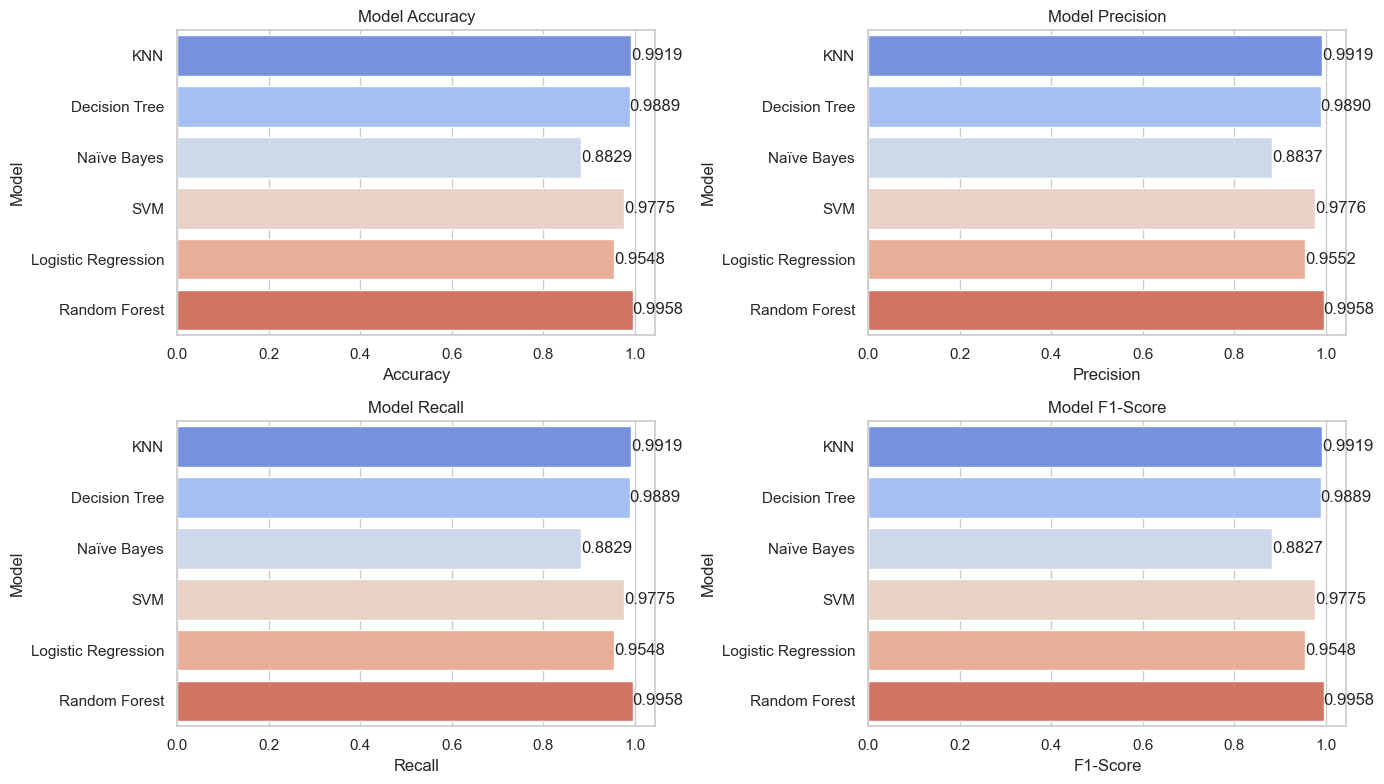

In [83]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

models = [knn_model, dt_model, nb_model, svm_model, lr_model, rf_model]
model_names = ['KNN', 'Decision Tree', 'Naïve Bayes', 'SVM', 'Logistic Regression', 'Random Forest']

results = []
column_of_interest = 'Type'

for model, name in zip(models, model_names):
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test[column_of_interest], predictions)
    precision = precision_score(y_test[column_of_interest], predictions, average='weighted')
    recall = recall_score(y_test[column_of_interest], predictions, average='weighted')
    f1 = f1_score(y_test[column_of_interest], predictions, average='weighted')

    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1-Score': round(f1, 4)
    })

df_results = pd.DataFrame(results)
print(df_results)

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Accuracy
sns.barplot(x='Accuracy', y='Model', data=df_results, palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Model Accuracy')
for i in axes[0, 0].containers:
    axes[0, 0].bar_label(i, fmt='%.4f')  # Adjusted to 4 decimal places

# Precision
sns.barplot(x='Precision', y='Model', data=df_results, palette='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title('Model Precision')
for i in axes[0, 1].containers:
    axes[0, 1].bar_label(i, fmt='%.4f')  # Adjusted to 4 decimal places

# Recall
sns.barplot(x='Recall', y='Model', data=df_results, palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Model Recall')
for i in axes[1, 0].containers:
    axes[1, 0].bar_label(i, fmt='%.4f')  # Adjusted to 4 decimal places

# F1-Score
sns.barplot(x='F1-Score', y='Model', data=df_results, palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Model F1-Score')
for i in axes[1, 1].containers:
    axes[1, 1].bar_label(i, fmt='%.4f')  # Adjusted to 4 decimal places

plt.tight_layout()
plt.show()


# Zero Trust Predicted

In [41]:
import pickle

with open('encoder_Type.pkl', 'rb') as file:
    encoder_Type = pickle.load(file)
with open('encoder_Type_of_Attack.pkl', 'rb') as file:
    encoder_Type_of_Attack = pickle.load(file)
with open('encoder_Attack_Scenario.pkl', 'rb') as file:
    encoder_Attack_Scenario = pickle.load(file)

y_pred = knn_model.predict(X_test)

decoded_type = encoder_Type.inverse_transform(y_pred[:, 0])
decoded_type_of_attack = encoder_Type_of_Attack.inverse_transform(y_pred[:, 1])
decoded_attack_scenario = encoder_Attack_Scenario.inverse_transform(y_pred[:, 2])

predictions_df = pd.DataFrame({
    'Predicted Type': decoded_type,
    'Predicted Type of Attack': decoded_type_of_attack,
    'Predicted Attack Scenario': decoded_attack_scenario
}, index=X_test.index)

type_scores = {
    'Normal': 0, 'Attack': 1
    }
attack_scenario_scores = {
    'No Attack': 0, 'WPA2-PSK WIFI Cracking Attack': 3.5, 'Wifi Deauthentication Attack': 3, 'TELLO API Exploit':4
    }
type_of_attack_scores = {
    'No Attack': 0, 'WPA2-PSK WIFI Cracking Attack': 3.5, 'Wifi Deauthentication Attack': 3, 'TELLO API Exploit':4
    }

def calculate_score(row):
    score = 0
    score += type_scores.get(row['Predicted Type'], 0)
    score += attack_scenario_scores.get(row['Predicted Attack Scenario'], 0)
    score += type_of_attack_scores.get(row['Predicted Type of Attack'], 0)
    return score

predictions_df['Predicted Score'] = predictions_df.apply(calculate_score, axis=1)
print(predictions_df[['Predicted Score', 'Predicted Type', 'Predicted Attack Scenario', 'Predicted Type of Attack']].value_counts())
predictions_df.head(20)

Predicted Score  Predicted Type  Predicted Attack Scenario      Predicted Type of Attack     
8.0              Attack          WPA2-PSK WIFI Cracking Attack  WPA2-PSK WIFI Cracking Attack    3604
3.5              Normal          WPA2-PSK WIFI Cracking Attack  No Attack                        2886
3.0              Normal          Wifi Deauthentication Attack   No Attack                        1172
7.0              Attack          Wifi Deauthentication Attack   Wifi Deauthentication Attack      776
0.0              Normal          No Attack                      No Attack                          70
9.0              Attack          TELLO API Exploit              TELLO API Exploit                  38
dtype: int64


Predicted Type       Predicted Type of Attack  \
23422         Attack   Wifi Deauthentication Attack   
40737         Attack   Wifi Deauthentication Attack   
6119          Attack  WPA2-PSK WIFI Cracking Attack   
12573         Attack   Wifi Deauthentication Attack   
38876         Normal                      No Attack   
28881         Normal                      No Attack   
10200         Normal                      No Attack   
21335         Normal                      No Attack   
20371         Normal                      No Attack   
10657         Normal                      No Attack   
21441         Normal                      No Attack   
10157         Attack  WPA2-PSK WIFI Cracking Attack   
2608          Normal                      No Attack   
8658          Attack  WPA2-PSK WIFI Cracking Attack   
11839         Attack  WPA2-PSK WIFI Cracking Attack   
36072         Normal                      No Attack   
29392         Attack  WPA2-PSK WIFI Cracking Attack   
27256         Normal                      No Attack   
23129         Attack  WPA2-PSK WIFI Cracking Attack   
34563         Normal                      No Attack   

           Predicted Attack Scenario  Predicted Score  
23422   Wifi Deauthentication Attack              7.0  
40737   Wifi Deauthentication Attack              7.0  
6119   WPA2-PSK WIFI Cracking Attack              8.0  
12573   Wifi Deauthentication Attack              7.0  
38876   Wifi Deauthentication Attack              3.0  
28881   Wifi Deauthentication Attack              3.0  
10200  WPA2-PSK WIFI Cracking Attack              3.5  
21335  WPA2-PSK WIFI Cracking Attack              3.5  
20371  WPA2-PSK WIFI Cracking Attack              3.5  
10657   Wifi Deauthentication Attack              3.0  
21441  WPA2-PSK WIFI Cracking Attack              3.5  
10157  WPA2-PSK WIFI Cracking Attack              8.0  
2608    Wifi Deauthentication Attack              3.0  
8658   WPA2-PSK WIFI Cracking Attack              8.0  
11839  WPA2-PSK WIFI Cracking Attack              8.0  
36072  WPA2-PSK WIFI Cracking Attack              3.5  
29392  WPA2-PSK WIFI Cracking Attack              8.0  
27256  WPA2-PSK WIFI Cracking Attack              3.5  
23129  WPA2-PSK WIFI Cracking Attack              8.0  
34563   Wifi Deauthentication Attack              3.0

In [150]:
# attack_scenario_scores = {
#     'No Attack': 0, 'WPA2-PSK WIFI Cracking Attack': 3.5, 'Wifi Deauthentication Attack': 3, 'TELLO API Exploit':4
#     }
# type_of_attack_scores = {
#     'No Attack': 0, 'WPA2-PSK WIFI Cracking Attack': 3.5, 'Wifi Deauthentication Attack': 3, 'TELLO API Exploit':4
#     }
# 
# def calculate_score(row):
#     score = 0
#     # We will no longer use "Type" to calculate "Score"
#     score += attack_scenario_scores.get(row['Attack.Scenario'], 0)
#     score += type_of_attack_scores.get(row['Type.of.Attack'], 0)
#     return score
# 
# test_df['Score'] = test_df.apply(calculate_score, axis=1)
# 
# def preprocess_data(df):
#     df['Time'] = pd.to_datetime(df['Time'])
#     df['Month'] = df['Time'].dt.month
#     df['Day'] = df['Time'].dt.day
#     df['Hour'] = df['Time'].dt.hour
#     df['Minute'] = df['Time'].dt.minute
# 
#     for column in ['Source', 'Destination']:
#         df[column] = df[column].fillna('Unknown') 
#         df[column] = df[column].astype(str) 
#         df[column + '_Type'] = df[column].apply(lambda x: 'MAC' if is_mac_address(x) else ('IP' if '.' in x else 'Other'))
#         df[column + '_OUI'] = df[column].apply(lambda x: extract_oui(x) if is_mac_address(x) else 'Unknown')
# 
#     df['Is_BSSID'] = df['Source'].apply(lambda x: 'Yes' if 'BSSID' in str(x) else 'No')
#     df['Is_RA'] = df['Destination'].apply(lambda x: 'Yes' if 'RA' in str(x) else 'No')
#     
#     df['Flags'] = df['Info'].astype(str).apply(extract_flags)
#     df['Sequence_Number'] = df['Info'].apply(lambda x: extract_sn_fn(x, 'SN'))
#     df['Fragment_Number'] = df['Info'].apply(lambda x: extract_sn_fn(x, 'FN'))
#     df['Sequence_Number'] = pd.to_numeric(df['Sequence_Number'], errors='coerce')
#     df['Fragment_Number'] = pd.to_numeric(df['Fragment_Number'], errors='coerce')
#     
#     df['Sequence_Number'] = df['Sequence_Number'].astype('Int64') 
#     df['Fragment_Number'] = df['Fragment_Number'].astype('Int64')
#     
#     df['Time'] = pd.to_datetime(df['Time'])
#     df['Detection_Time'] = pd.to_datetime(df['Time'], format='%d/%m/%Y %H:%M')
#     df['Response_Time'] = df['Detection_Time'] + pd.to_timedelta(np.random.randint(5, 11, size=len(df)), unit='s')
#     df['Latency'] = (df['Response_Time'] - df['Detection_Time']).dt.total_seconds()
# 
#     categorical_columns = ['Protocol', 'Type.of.Attack', 'Attack.Scenario',
#                        'Destination', 'Destination_OUI', 'Destination_Type', 'Source', 
#                        'Source_OUI', 'Source_Type', 'Is_BSSID', 'Is_RA', 'Info', 'Flags']
#     encoder = LabelEncoder()
#     for column in categorical_columns:
#         df[column] = df[column].fillna('Missing')  # Fill missing values
#         df[column] = encoder.fit_transform(df[column])  # Encode categorical data
#     
#     df['Sequence_Number'].fillna(df['Sequence_Number'].median(), inplace=True)
#     df['Fragment_Number'].fillna(df['Fragment_Number'].median(), inplace=True)
#     
#     list_cls = ['Time', 'Detection_Time', 'Response_Time', 'Type.of.Attack', 'Attack.Scenario', 'Score']
#     df.drop(list_cls, axis=1, inplace=True)
# 
#     return df
# processed_test_df = preprocess_data(test_df)

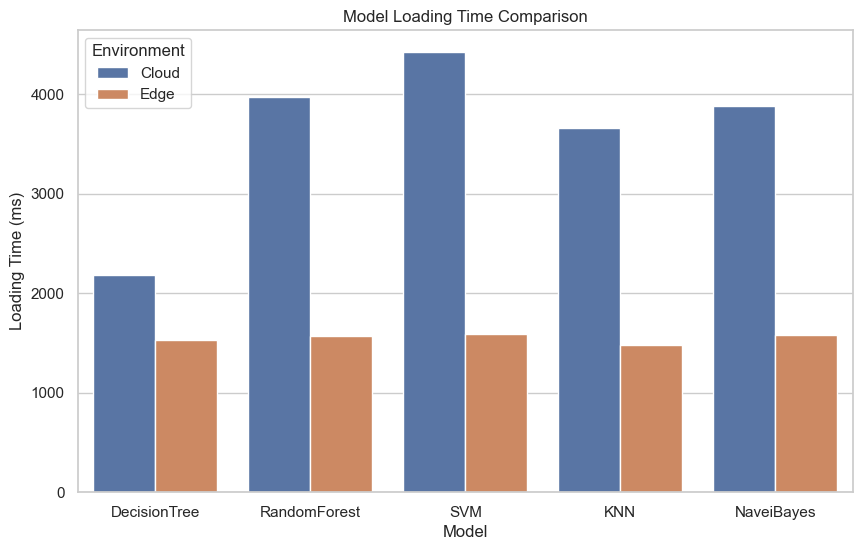

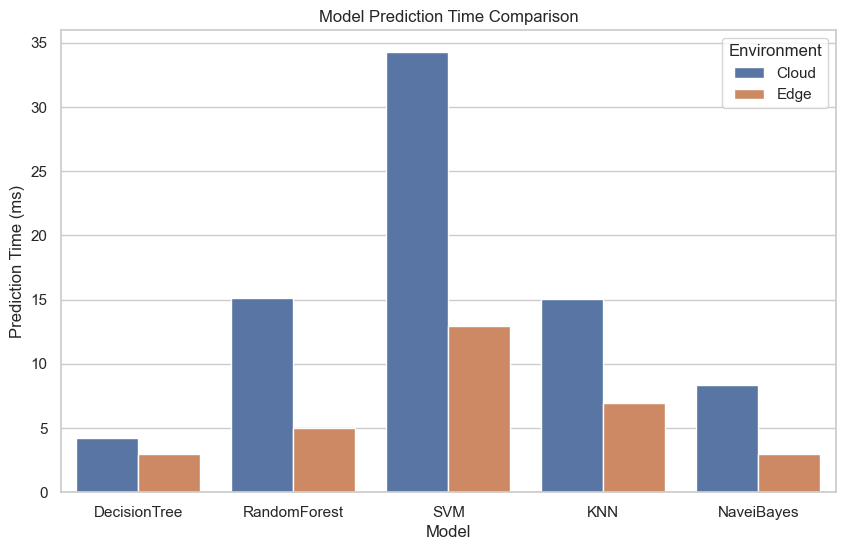

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = {
    'Model': ['DecisionTree', 'DecisionTree', 'RandomForest', 'RandomForest', 'SVM', 'SVM','KNN', 'KNN', 'NaveiBayes', 'NaveiBayes'],
    'Environment': ['Cloud', 'Edge', 'Cloud', 'Edge', 'Cloud', 'Edge', 'Cloud', 'Edge', 'Cloud', 'Edge'],
    'Loading Time (ms)': [2187.12, 1525.38, 3971.86, 1573.91, 4421.19, 1587.06,3659.31,1476.61,3879.08,1581.25],
    'Prediction Time (ms)': [4.26, 2.99, 15.13, 4.98, 34.25, 12.96,15.01,6.98,8.32,2.99]
}
df = pd.DataFrame(data)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Loading Time (ms)", hue="Environment", data=df)
plt.title("Model Loading Time Comparison")
plt.savefig('model_loading_time_comparison.png')
plt.show()
plt.close()
 
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Prediction Time (ms)", hue="Environment", data=df)
plt.title("Model Prediction Time Comparison")
plt.savefig('model_prediction_time_comparison.png')
plt.show()
plt.close()


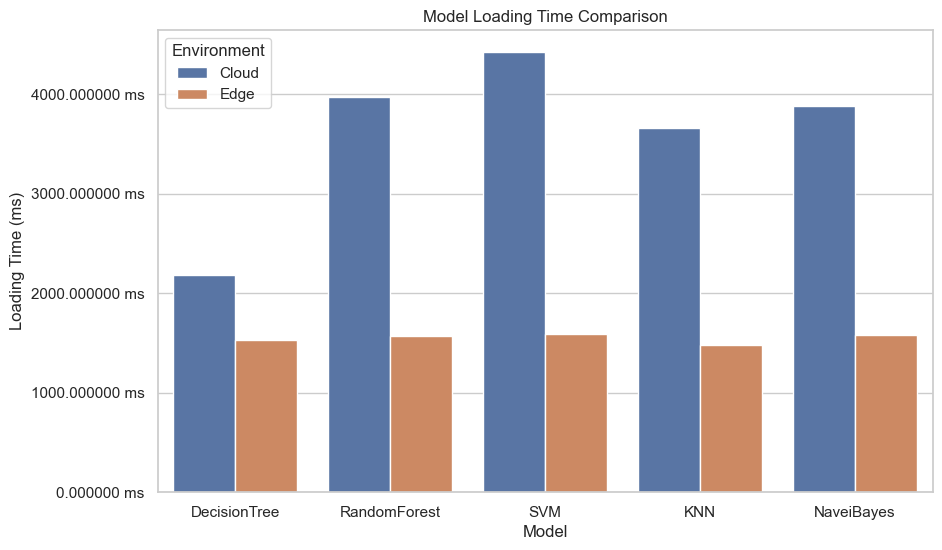

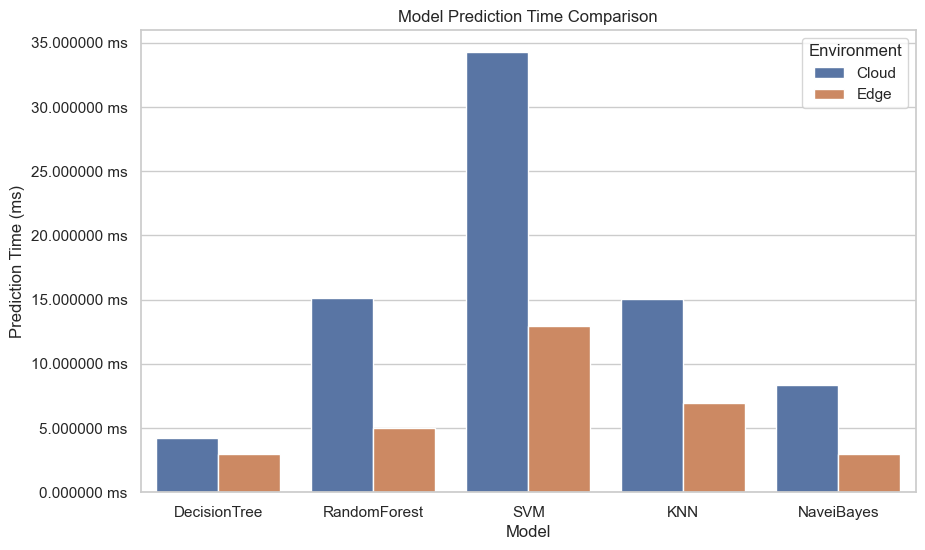

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    'Model': ['DecisionTree', 'DecisionTree', 'RandomForest', 'RandomForest', 'SVM', 'SVM','KNN', 'KNN', 'NaveiBayes', 'NaveiBayes', 'LR','LR'],
    'Environment': ['Cloud', 'Edge', 'Cloud', 'Edge', 'Cloud', 'Edge', 'Cloud', 'Edge', 'Cloud', 'Edge'],
    'Loading Time (ms)': [2187.12, 1525.38, 3971.86, 1573.91, 4421.19, 1587.06,3659.31,1476.61,3879.08,1581.25, 1581.25, 1581.25],
    'Prediction Time (ms)': [4.26, 2.99, 15.13, 4.98, 34.25, 12.96,15.01,6.98,8.32,2.99, 1581.25, 1581.25]
}

df = pd.DataFrame(data)
sns.set(style="whitegrid")

# Plotting Loading Time
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Loading Time (ms)", hue="Environment", data=df)
plt.title("Model Loading Time Comparison")

# Formatting y-axis to show ms
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.6f} ms'))

plt.savefig('model_loading_time_comparison.png')
plt.show()
plt.close()

# Plotting Prediction Time
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Prediction Time (ms)", hue="Environment", data=df)
plt.title("Model Prediction Time Comparison")

# Formatting y-axis to show ms
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.6f} ms'))

plt.savefig('model_prediction_time_comparison.png')
plt.show()
plt.close()


c:\Users\alano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\alano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\alano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\alano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: 


Confusion Matrix:
 [[4396    0]
 [   0 4150]]

Model: Random Forest
Cross-validation accuracy scores: [1.         1.         1.         0.99985374 0.99985372]
Mean cross-validation accuracy: 0.9999414905284663
Accuracy on test set: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4396
           1       1.00      1.00      1.00      4150

    accuracy                           1.00      8546
   macro avg       1.00      1.00      1.00      8546
weighted avg       1.00      1.00      1.00      8546

K-Nearest Neighbors (KNN) Model Evaluation:
Accuracy on test set: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0

False Positive Rate: 0.0, 
False Negative Rate: 0.0, 
False Alarm Rate: 0.0, 
Sensitivity: 1.0, 
Specificity: 1.0, 
Matthews Correlation Coefficient: 1.0

System Performance Metrics:
Prediction Latency (seconds): 0.021027565002441406
Total System Latency (seconds, including 10 seconds): 10.0210275650

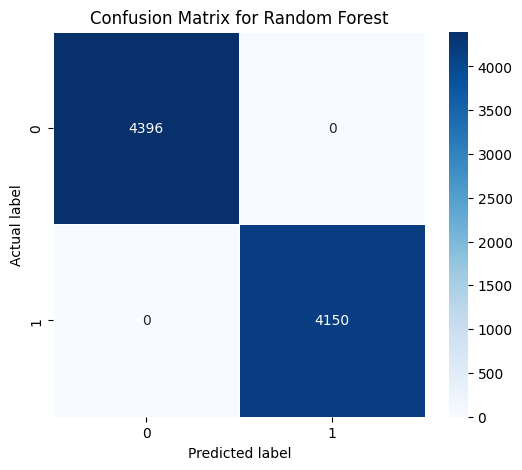

In [ ]:
models = [knn_model, dt_model, nb_model, svm_model, lr_model, rf_model]
model_names = ['KNN', 'Decision Tree', 'Naïve Bayes', 'SVM', 'Logistic Regression', 'Random Forest']

for model, name in zip(models, model_names):
       
    predictions, prediction_latency, total_system_latency, cpu_usage, memory_usage = total_system_with_network_latency(model, X_test)

    # Perform cross-validation

    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Evaluate the model
acc = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions, digits=5)
conf_matrix = confusion_matrix(y_test, predictions)
f1 = f1_score(y_test,  predictions, average='weighted')
precision = precision_score(y_test,  predictions, average='weighted')
recall = recall_score(y_test,  predictions, average='weighted')

# Printing the evaluation metrics

print("\nConfusion Matrix:\n", conf_matrix)
    
FPR, FNR, FAR, sensitivity, specificity, mcc = false_alarm_rate(y_test, predictions)
    
print(f"\nModel: {name}")
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean()}")
print("Accuracy on test set:", acc)
print("Classification Report:")
print(report)
print("K-Nearest Neighbors (KNN) Model Evaluation:")
print("Accuracy on test set:", acc)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print(f"\nFalse Positive Rate: {FPR}, \nFalse Negative Rate: {FNR}, \nFalse Alarm Rate: {FAR}, \nSensitivity: {sensitivity}, \nSpecificity: {specificity}, \nMatthews Correlation Coefficient: {mcc}")
print("\nSystem Performance Metrics:")
print(f"Prediction Latency (seconds): {prediction_latency}")
print(f"Total System Latency (seconds, including 10 seconds): {total_system_latency}")
print(f"CPU Usage (% change): {cpu_usage}")
print(f"Memory Usage (bytes change): {memory_usage}")
print("=====================================================")
    
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', linewidths=.5)
plt.title(f'Confusion Matrix for {name}')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

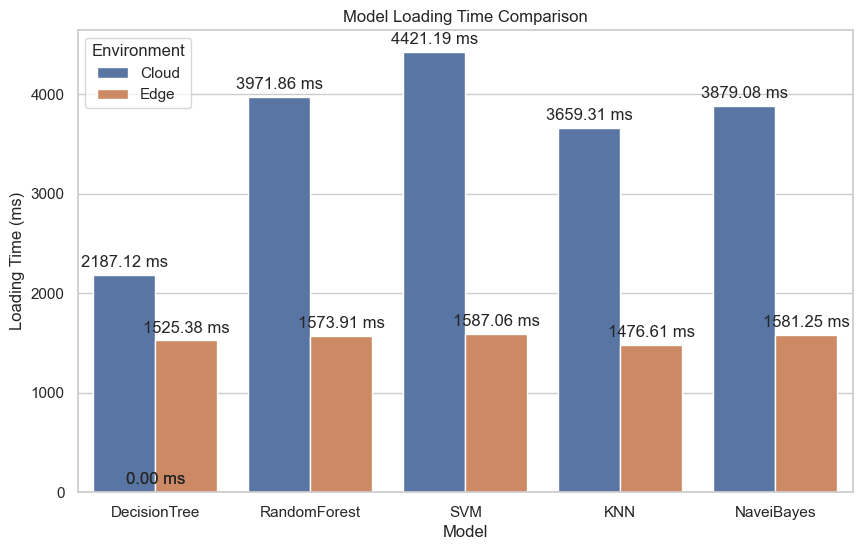

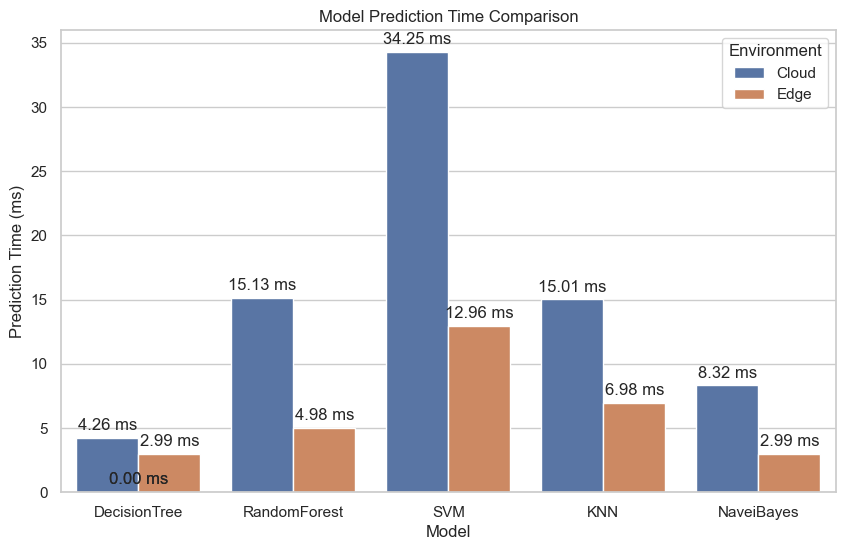

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    'Model': ['DecisionTree', 'DecisionTree', 'RandomForest', 'RandomForest', 'SVM', 'SVM','KNN', 'KNN', 'NaveiBayes', 'NaveiBayes'],
    'Environment': ['Cloud', 'Edge', 'Cloud', 'Edge', 'Cloud', 'Edge', 'Cloud', 'Edge', 'Cloud', 'Edge'],
    'Loading Time (ms)': [2187.12, 1525.38, 3971.86, 1573.91, 4421.19, 1587.06,3659.31,1476.61,3879.08,1581.25],
    'Latency (ms)': [4.26, 2.99, 15.13, 4.98, 34.25, 12.96,15.01,6.98,8.32,2.99]
}

df = pd.DataFrame(data)
sns.set(style="whitegrid")

# Plotting Loading Time
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Model", y="Loading Time (ms)", hue="Environment", data=df)
plt.title("Model Loading Time Comparison")

# Annotating each bar with its value
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f} ms', 
                (p.get_x() + p.get_width() / 2., height),
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.savefig('model_loading_time_comparison.png')
plt.show()
plt.close()

# Plotting Prediction Time
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Model", y="Latency (ms)", hue="Environment", data=df)
plt.title("Model Prediction Time Comparison")

# Annotating each bar with its value
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f} ms', 
                (p.get_x() + p.get_width() / 2., height),
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.savefig('model_prediction_time_comparison.png')
plt.show()
plt.close()


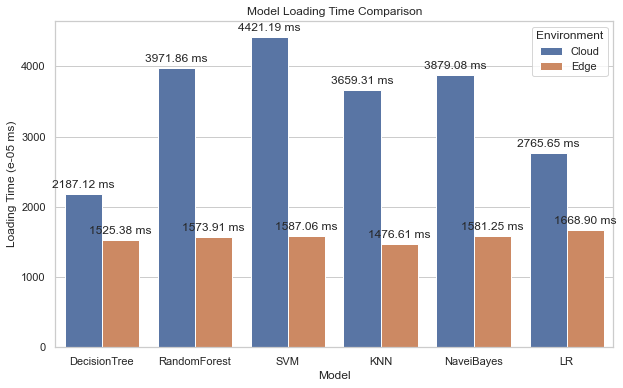

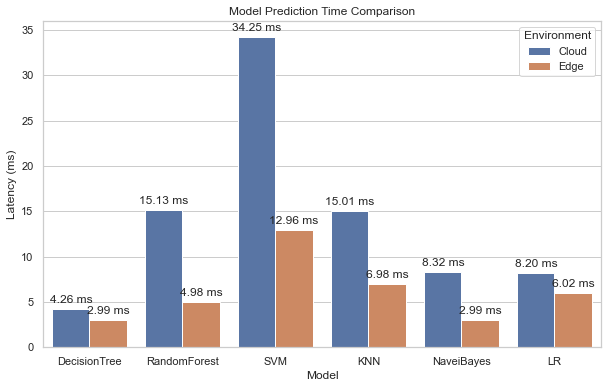

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    'Model': ['DecisionTree', 'DecisionTree', 'RandomForest', 'RandomForest', 'SVM', 'SVM','KNN', 'KNN', 'NaveiBayes', 'NaveiBayes','LR','LR'],
    'Environment': ['Cloud', 'Edge', 'Cloud', 'Edge', 'Cloud', 'Edge', 'Cloud', 'Edge', 'Cloud', 'Edge','Cloud', 'Edge'],
    'Loading Time (e-05 ms)': [2187.12, 1525.38, 3971.86, 1573.91, 4421.19, 1587.06,3659.31,1476.61,3879.08,1581.25, 2765.65, 1668.90 ],
    'Latency (ms)': [4.26, 2.99, 15.13, 4.98, 34.25, 12.96,15.01,6.98,8.32,2.99, 8.20,6.02 ]
}

df = pd.DataFrame(data)
sns.set(style="whitegrid")

# Plotting Loading Time
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Model", y="Loading Time (e-05 ms)", hue="Environment", data=df)
plt.title("Model Loading Time Comparison")

# Annotating each bar with its value, but only if the height is not zero
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than 0
        ax.annotate(f'{height:.2f} ms', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

plt.savefig('model_loading_time_comparison.png')
plt.show()
plt.close()

# Plotting Prediction Time
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Model", y="Latency (ms)", hue="Environment", data=df)
plt.title("Model Prediction Time Comparison")

# Annotating each bar with its value, but only if the height is not zero
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than 0
        ax.annotate(f'{height:.2f} ms', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

plt.savefig('model_prediction_time_comparison.png')
plt.show()
plt.close()


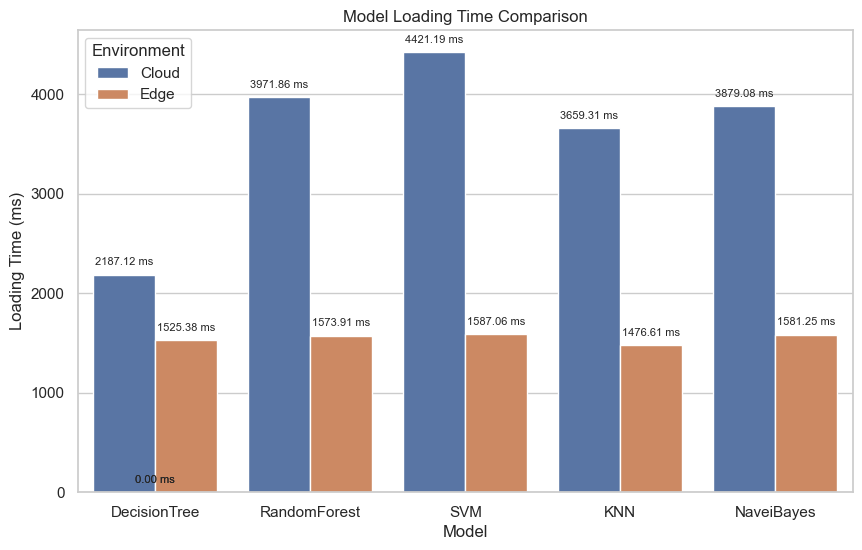

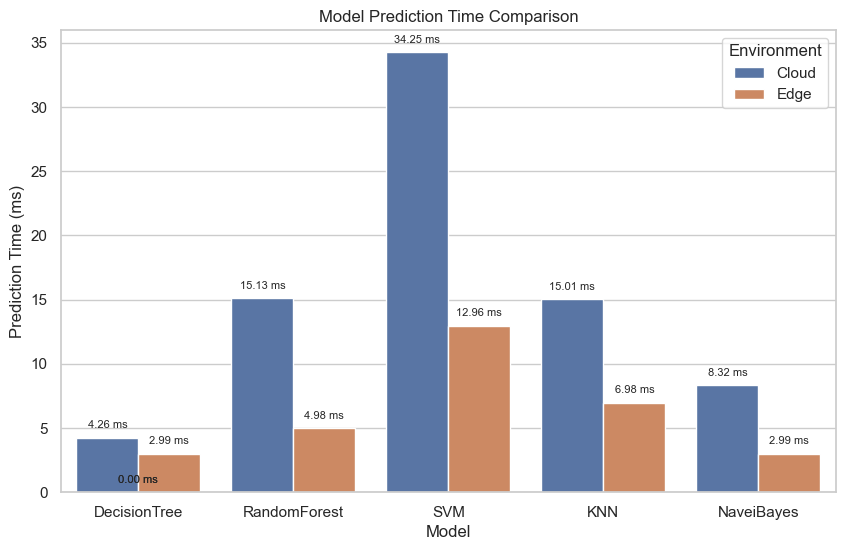

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    'Model': ['DecisionTree', 'DecisionTree', 'RandomForest', 'RandomForest', 'SVM', 'SVM','KNN', 'KNN', 'NaveiBayes', 'NaveiBayes'],
    'Environment': ['Cloud', 'Edge', 'Cloud', 'Edge', 'Cloud', 'Edge', 'Cloud', 'Edge', 'Cloud', 'Edge'],
    'Loading Time (ms)': [2187.12, 1525.38, 3971.86, 1573.91, 4421.19, 1587.06,3659.31,1476.61,3879.08,1581.25],
    'Prediction Time (ms)': [4.26, 2.99, 15.13, 4.98, 34.25, 12.96,15.01,6.98,8.32,2.99]
}

df = pd.DataFrame(data)
sns.set(style="whitegrid")

# Plotting Loading Time
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Model", y="Loading Time (ms)", hue="Environment", data=df)
plt.title("Model Loading Time Comparison")

# Annotating each bar with its value
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f} ms', 
                (p.get_x() + p.get_width() / 2., height),
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=8)  # Set the fontsize here

plt.savefig('model_loading_time_comparison.png')
plt.show()
plt.close()

# Plotting Prediction Time
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Model", y="Prediction Time (ms)", hue="Environment", data=df)
plt.title("Model Prediction Time Comparison")

# Annotating each bar with its value
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f} ms', 
                (p.get_x() + p.get_width() / 2., height),
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize=8)  # Set the fontsize here

plt.savefig('model_prediction_time_comparison.png')
plt.show()
plt.close()


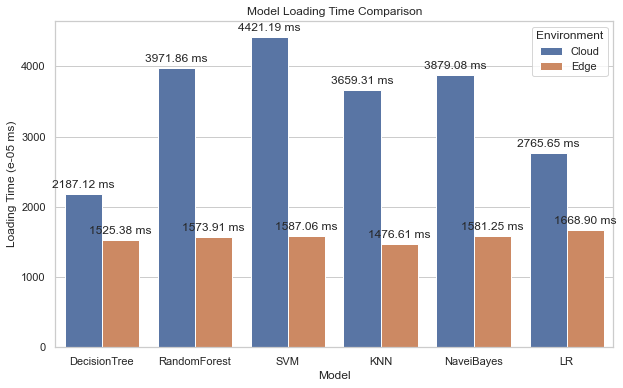

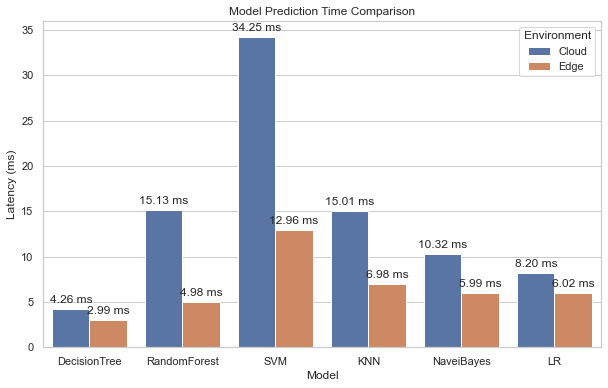

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


data = {
    'Model': ['DecisionTree', 'DecisionTree', 'RandomForest', 'RandomForest', 'SVM', 'SVM','KNN', 'KNN', 'NaveiBayes', 'NaveiBayes','LR','LR'],
    'Environment': ['Cloud', 'Edge', 'Cloud', 'Edge', 'Cloud', 'Edge', 'Cloud', 'Edge', 'Cloud', 'Edge','Cloud', 'Edge'],
    'Loading Time (e-05 ms)': [2187.12, 1525.38, 3971.86, 1573.91, 4421.19, 1587.06,3659.31,1476.61,3879.08,1581.25, 2765.65, 1668.90 ],
    'Latency (ms)': [4.26, 2.99, 15.13, 4.98, 34.25, 12.96,15.01,6.98,10.32,5.99, 8.20,6.02 ]
}

df = pd.DataFrame(data)
sns.set(style="whitegrid")

# Plotting Loading Time
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Model", y="Loading Time (e-05 ms)", hue="Environment", data=df)
plt.title("Model Loading Time Comparison")

# Annotating each bar with its value, but only if the height is not zero
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than 0
        ax.annotate(f'{height:.2f} ms', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

plt.savefig('model_loading_time_comparison.png')
plt.show()
plt.close()

# Plotting Prediction Time
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Model", y="Latency (ms)", hue="Environment", data=df)
plt.title("Model Prediction Time Comparison")

# Annotating each bar with its value, but only if the height is not zero
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than 0
        ax.annotate(f'{height:.2f} ms', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

plt.savefig('model_prediction_time_comparison.png')
plt.show()
plt.close()
